!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng
from tqdm import tqdm
from itertools import product #combinations_with_replacement
import binascii
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 500

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

## world size
ws = 40
world_size_x = ws
world_size_y = ws

##TODo if world_size_x != world_size_y fit then limit coord_full_list 

coord_full_list = np.array(list(product(range(ws), repeat=2)))
ind = np.random.choice(len(coord_full_list), nr_individuals, replace=False)
pos = coord_full_list[ind]

## initial brain and position generator

result = calculate_individual_output_weights(individuals)

## add genome

for indiv in result:
    result[indiv]['genome'] = [i.hex_id for i in individuals[indiv]]
    
## assign position and remove brains without output

indiv_to_del = []
for indiv in result:
    if result[indiv]['out']:
        result[indiv]['position'] = [list(pos[indiv])]
    else:
        indiv_to_del.append(indiv)

for key in indiv_to_del:
    del result[key] 

11010101101110111010001101011111
11010010101101110100011111010010
1101000100100100010011010001111
11010110000101001010001001011010
1011010010011011101110111001111
11001010100110011100010001100000
1111100110111011110110001011010
11100111101111001000110011000101
1111011101111110110101011010101
1110101110001001010001101100001
10011000100001000001100011001
11111011011000111111110010011110
10001011110010011011010100101101
1011000100010110100011011101100
10000111000010010000010010110010
11010011101101000000000100111101
10101101110001110000001010011110
1110010000111111100100010010000
1110110110001010110010010100
1110111100001010111000011111
11010110110101001000011101000
11011001110101110111010101010011
10011001110100101010010000000011
1010101001011111110010000101010
11110001001111010110011101010011
101101000000010001011100101111
10101101010110101100110010110101
1000001101111011111111010011001
11010001010001110000001110100110
11001010011110010001111001010011
1100111110011010110110101110100
111

1001101000101011010010000101111
110111111000010000100100110100
11111010010100100100101011001110
1101110110100100101111100111111
1111101110010010011101001110100
11000000110110011000010101101001
111011011101110110011001110010
110001101111011111101111101010
100010111111000111100011100000
11111101110011000011001001111111
11010101001111000111000001010100
101000110011010001011010010110
1011011011111011100000001001
1010001011100011001001000110101
1111110111101101101110100000000
1111000000010101000101000001100
111111011100110001001111101
10111000010101101010011001101000
11011010110001100101010001001010
11110110101001011100111111110000
1111111010011000001110100111000
110110110000101100101010111010
11001101010100100011110001011011
10111110001100111110110111011011
101000010100101010001001000100
10110000000100110101001011110
101110111100000100100001110110
10001011101011000111110010110
1111111001000010101000011001011
11010110100001000011010011011101
10011010001100100001101011000111
1110100011110101

In [4]:
len('11011010010111110111110100001001')

32

In [ ]:
# result

In [3]:
def prevent_overlap_movement(last_pos_list, result):
    '''check if last position of each individual ovrlap with another. If yes then last posotion is switched to last but one. 
    last_pos_list - dictionary of individuals kesy and last position
    result- total info about all individuals'''
    list_of_resuls = []
    for key_1, val_1 in last_pos_list.items():
        last_pos_list_copy = copy.copy(last_pos_list)
        del last_pos_list_copy[key_1]
        list_of_keys = []
        for key_2, val_2 in last_pos_list_copy.items():
            if val_1 == val_2:
                pos2_minus = result[key_2]['position']
                pos1_minus = result[key_1]['position']
                
                if pos2_minus[-1] != pos2_minus[-2]:
                    pos2_minus[-1] = pos2_minus[-2]
                    last_pos_list[key_2] = pos2_minus[-2]
                    prevent_overlap_movement(last_pos_list, result)
                    list_of_resuls.append(2)
                elif pos2_minus[-1]== pos2_minus[-2] and pos1_minus[-1] != pos1_minus[-2]:
                    pos1_minus[-1] = pos1_minus[-2]
                    last_pos_list[key_1] = pos1_minus[-2]
                    prevent_overlap_movement(last_pos_list, result)
                    list_of_resuls.append(1)
                else:
                    list_of_resuls.append([[key_1, key_2]])
#     print(list_of_resuls)

In [4]:
nr_of_errors = 0

k = ws
n = 0
pbar = tqdm(total=k, initial=n)

while k>n: 
#     print(n)
    pos_list = [tuple(result[obj]['position'][-1]) for obj in result]
    res = list(set([ele for ele in pos_list if pos_list.count(ele) > 1]))
#     print(res)
    pbar.update(1)
    for indiv in result:
        x, y = result[indiv]['position'][-1][0], result[indiv]['position'][-1][1]
        if n<1:
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)    
        elif n >= 1:
            apply_input(result, indiv)
            calculate_position(result, indiv, x, y, world_size_x, world_size_y)
    last_pos_list = {obj:result[obj]['position'][-1] for obj in result}
    prevent_overlap_movement(last_pos_list, result)
#     print()
    n += 1
pbar.close()


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [01:57<00:00,  2.95s/it]


In [5]:
df = pd.DataFrame()
for key in result:
    df[key] = pd.Series(result[key]['position']).apply(lambda x: '.'.join((str(x[0]),str(x[1]))))

print(Counter(df.iloc[-1,:]).most_common(10))

# df

[('19.40', 1), ('0.2', 1), ('1.25', 1), ('18.28', 1), ('5.20', 1), ('40.27', 1), ('33.21', 1), ('18.0', 1), ('40.13', 1), ('24.36', 1)]


generate dictionary of coords 

In [6]:
coords = [{'x':[], 'y':[]} for key in range(len(result[indiv]['position']))]
for indiv in result:
    for pos_nr, pos in enumerate(result[indiv]['position']):
        coords[pos_nr]['x'].append(pos[0])
        coords[pos_nr]['y'].append(pos[1])

visualisation

<IPython.core.display.Javascript object>


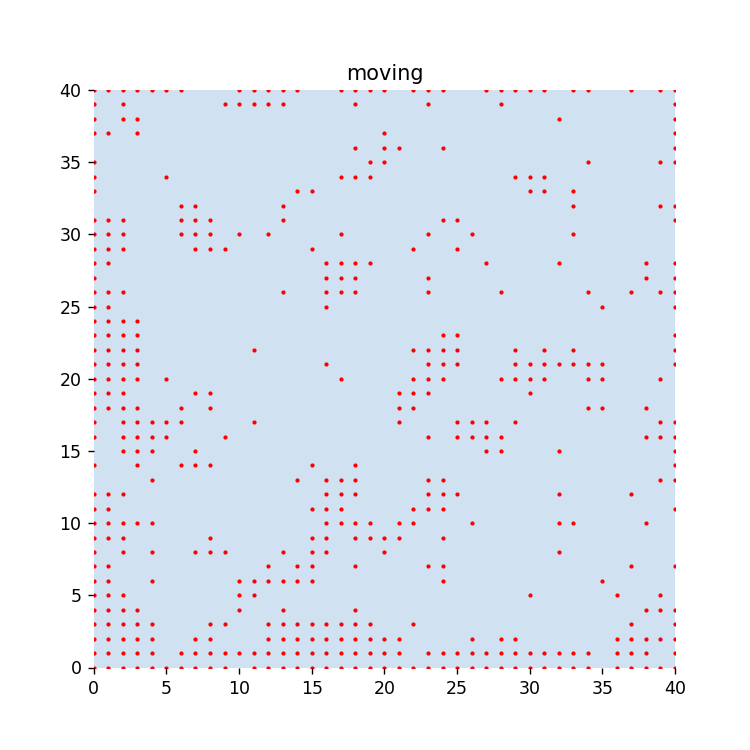

In [7]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Blues(.2))

    ax.set_xlim([0,world_size_x])
    ax.set_ylim([0,world_size_y])
    ax.set_title('moving')
    ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
    [spine.set_visible(False) for spine in ax.spines.values()] #remove chart 
    
fig, ax = plt.subplots(figsize=(6,6))
anime = FuncAnimation(
    fig = fig,
    func = update,
    frames = len(coords),
    interval = 10, repeat=False
)


### mutation

hexa to binary

In [11]:
result[0]['genome']

['d5bba35f',
 'd2b747d2',
 '6892268f',
 'd614a25a',
 '5a4dddcf',
 'ca99c460',
 '7cddec5a',
 'e7bc8cc5']

In [35]:
aa = ['d5bba35f',
 'd2b747d2',
 '6892268f',
 'd614a25a',
 '5a4dddcf',
 'ca99c460',
 '7cddec5a',
 'e7bc8cc5']
print(aa)
genome = copy.copy(aa)

for gene_nr, gene in enumerate(genome):
    binary_gene = hexval_to_bin(gene)
    binary_mutated = mutation(binary_gene, weight=0.09)
    if binary_mutated != binary_gene:
        print(gene_nr)
        genome[gene_nr] = hex(int(binary_mutated, 2))[2:]
print(genome)

['d5bba35f', 'd2b747d2', '6892268f', 'd614a25a', '5a4dddcf', 'ca99c460', '7cddec5a', 'e7bc8cc5']
['d5bba35f', 'd2b747d2', '6892268f', 'd614a25a', '5a4dddcf', 'ca99c460', '7cddec5a', 'e7bc8cc5']
